* * *
<pre> NYU Paris            <i> Artificial intelligence - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab 5: Model complexity and model selection </h1>

<pre align="left"> June 1st 2023             <i> Author: Hicham Janati </i></pre>
* * *

**Deadline: Tuesday end of day 11:59 pm (Paris time)**

##### Goals:
- Know when the model underfits and overfits and act accordingly
- Perform hyperparameter tuning using cross validation
- Use scikit-learn pipelines to streamline machine learning steps

## Part 1 - Model complexity of a simple regression
To grasp the intuition behind model complexity and overfitting, let us consider the problem of fitting a uni-dimensional curve. This is in practice relevant for time series forecasting for example. We simulate such data using the following function (the implementation of the function is of no particular interest):

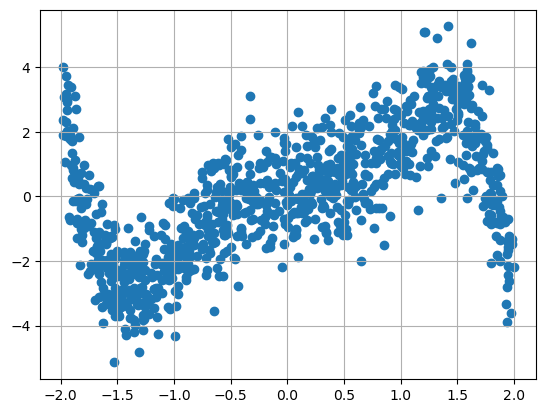

In [15]:
import numpy as np
from matplotlib import pyplot as plt

def generate_1d_data(n_samples=1000, noise_std=1., random_state=42):
    rng = np.random.RandomState(random_state)
    ### simulate random polynom coeficients 
    X = rng.rand(n_samples) * 4 - 2  # random x coordinates between -2 and 2
    y = 2 * X ** 3 * np.cos(X) + X ** 2 * np.sin(X) 
    y = y + noise_std * rng.randn(*y.shape) 
    return X, y

X, y = generate_1d_data()
plt.figure()
plt.scatter(X, y)
plt.grid()
plt.show()

### Question 1
Look-up the function in numpy `polyfit`. How can you use such a function to perform linear regression ?

In [16]:
#The function in numpy polyfit
np.polyfit?

Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically. See
the documentation of the method for more information.

Parameters
----------
x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    poi

the slope is 0.9455340480130808 and intercept is 0.0828134391778971


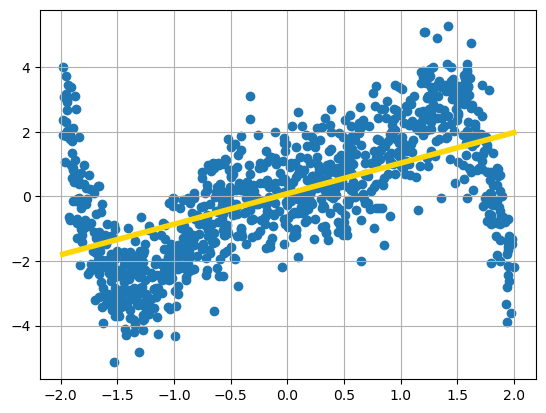

In [17]:
#Do the Linear Regression
slope, intercept = np.polyfit(X, y, deg=1)
print(f"the slope is {slope:.16g} and intercept is {intercept:.16g}")

point0 = X.min()
point1 = X.max()
y0 = slope * point0 + intercept
y1 = slope * point1 + intercept
plt.figure()
plt.scatter(X, y)
plt.plot([point0, point1], [y0, y1], color = 'gold', lw=4)
plt.grid()
plt.show()

### Question 2
Complete the following function that performs a polynomial regression.

In [18]:
def fit_poly_regression(X, y, degree=1):
    poly_coefs = np.polyfit(X, y, deg=degree)
    return poly_coefs

### Question 3
Write a function that makes predictions based on a polynomial fit coefficients vector `coef`.

In [19]:
def predict_poly_regression(coef, X):
    predicted  = np.polyval(coef, X)
    
    #Another way that is suggested
    polyme = np.poly1d(coef)
    predicted = polyme(X)
    return predicted

In [20]:
coefs = fit_poly_regression(X, y, 3)
ypredicted = predict_poly_regression(coefs, X)
print(coefs)
print(ypredicted)

[-0.80713934 -0.0150906   2.89429748  0.10046636]
[-1.25379689  0.53973426  2.12831109  1.19069849 -1.80795376 -1.80779469
 -0.60474652  1.77109394  1.21522121  2.0335659   0.18668515  0.12729543
  2.02461006 -2.02019797 -1.94365134 -1.94978046 -1.78759874  0.38614451
 -0.67225534 -1.8569936   1.32009911 -1.68427674 -1.85245916 -1.3277123
 -0.40420636  2.18433791 -1.99895344  0.26506324  1.12753443 -0.38052203
  1.27848736 -1.89258542 -0.73017475  0.57629819  0.2237946   2.13271038
 -1.78546461 -1.2323429   1.90215071 -0.58219136 -1.52060965  0.04462871
 -0.12800884  1.25622128 -1.98118191  1.75388833 -1.74312209  0.33228292
  0.63544872 -1.95519221  0.13472546  2.19159416  0.75666372  1.45438164
  1.18308849  1.06298941 -1.10485859 -1.98999523 -0.35585389 -1.65380007
 -1.12006445 -1.94177746  2.04505998 -1.41104346 -1.9042203   0.59030625
 -1.69616305  2.15140445 -0.89067866 -0.28227565  2.19206565 -1.9967499
  0.56229274  2.10690719  2.02772453  2.11865756  2.19206465 -0.88243027
 -1

### Question 4
Write a custom model (PolyFit) (which takes a `degree` parameter) inheriting from the scikit-learn `BaseEstimator`.

In [21]:
from sklearn.base import BaseEstimator

class PolyFit(BaseEstimator):
    def __init__(self, degree=1):
        self.degree = degree
    
    def fit(self, X, y):
        coef = fit_poly_regression(X, y, degree = self.degree)
        self.coef = coef
    
    def predict(self, X):
        y_predicted = predict_poly_regression(self.coef, X)
        return y_predicted

poly = PolyFit(degree=1)
poly.fit(X, y)
y_pred = poly.predict(X)

### Question 5
Perform polynomial regression using different values of `degree`. Before running the code, what do you expect for low values of `degree` (1) vs large ones (n) ? Visualize the obtained curves. Which ones is best ?



Expextation: For low values of degree, the model tends to underfit. For large ones, the value tends to overfit.
(In the second&third plot, we can see that for large n's, the curve 'explodes' at both ends, when we reduce datapoints to 200 in this question, for test use)

/var/folders/36/dlyz4clx5p71319x8bzw9n_h0000gn/T/ipykernel_90982/686127030.py:8: RankWarning: Polyfit may be poorly conditioned
  coef = fit_poly_regression(X, y, degree = self.degree)


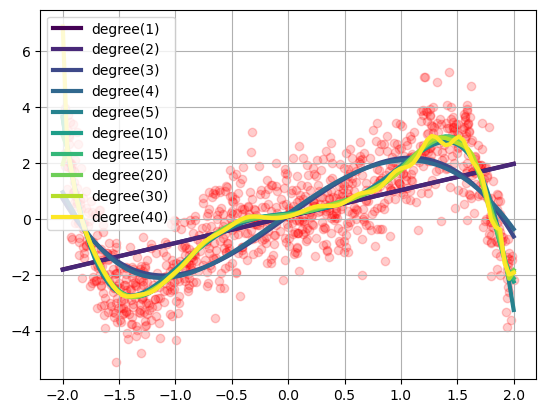

In [22]:
from matplotlib import cm
degrees = [1, 2, 3, 4, 5, 10, 15, 20 ,30 ,40]
colors = cm.viridis(np.linspace(0., 1., len(degrees)))
grid = np.linspace(-2, 2, 100)

plt.figure()
plt.scatter(X, y, color = 'r', alpha=0.2)

for degree, color in zip(degrees, colors):
    poly = PolyFit(degree = degree)
    poly.fit(X, y)
    y_pred = poly.predict(grid)
    plt.plot(grid, y_pred, color=color, lw=3, label=f"degree({degree})")
plt.legend()
plt.grid()
plt.show()

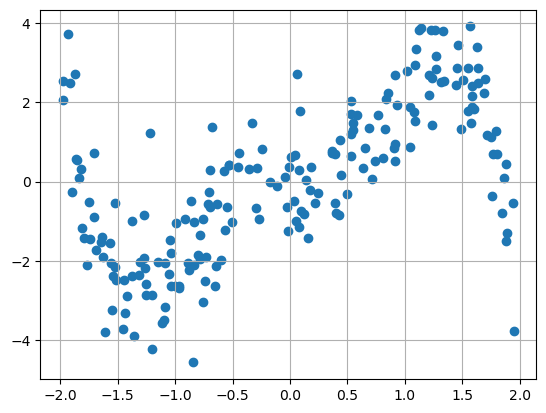

In [23]:
import numpy as np
from matplotlib import pyplot as plt

def generate_1d_data(n_samples=200, noise_std=1., random_state=42):
    rng = np.random.RandomState(random_state)
    ### simulate random polynom coeficients 
    X = rng.rand(n_samples) * 4 - 2  # random x coordinates between -2 and 2
    y = 2 * X ** 3 * np.cos(X) + X ** 2 * np.sin(X) 
    y = y + noise_std * rng.randn(*y.shape) 
    return X, y

X, y = generate_1d_data()
plt.figure()
plt.scatter(X, y)
plt.grid()
plt.show()

/var/folders/36/dlyz4clx5p71319x8bzw9n_h0000gn/T/ipykernel_90982/686127030.py:8: RankWarning: Polyfit may be poorly conditioned
  coef = fit_poly_regression(X, y, degree = self.degree)
/var/folders/36/dlyz4clx5p71319x8bzw9n_h0000gn/T/ipykernel_90982/686127030.py:8: RankWarning: Polyfit may be poorly conditioned
  coef = fit_poly_regression(X, y, degree = self.degree)
/var/folders/36/dlyz4clx5p71319x8bzw9n_h0000gn/T/ipykernel_90982/686127030.py:8: RankWarning: Polyfit may be poorly conditioned
  coef = fit_poly_regression(X, y, degree = self.degree)


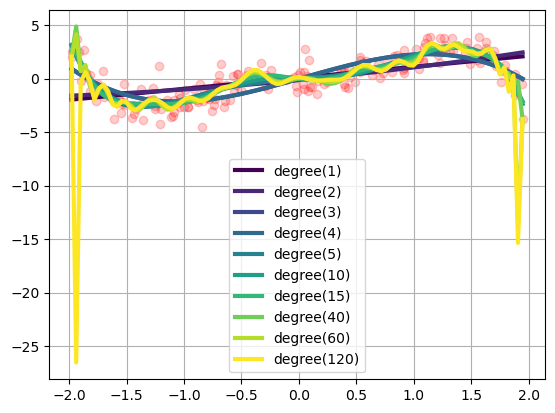

In [24]:
from matplotlib import cm
degrees = [1, 2, 3, 4, 5, 10, 15, 40 ,60 ,120]
colors = cm.viridis(np.linspace(0., 1., len(degrees)))
grid = np.linspace(X.min(), X.max(), 100)

plt.figure()
y_outlier = y.copy()
plt.scatter(X, y_outlier, color = 'r', alpha=0.2)

for degree, color in zip(degrees, colors):
    poly = PolyFit(degree = degree)
    poly.fit(X, y_outlier)
    y_pred = poly.predict(grid)
    plt.plot(grid, y_pred, color=color, lw=3, label=f"degree({degree})")
plt.legend()
plt.grid()
plt.show()

### Question 6
Do a train-test split and compute a score for each `degree` value. Visualize the test and train score as a function of `degree`. Which value of `degree` is best ?

In the code below, we calculate the mean-squared error for different degrees, which can be used as a benchmark to meaure accuracies.
We can see that the optimal degree is 10, which yields an error of 0.77.

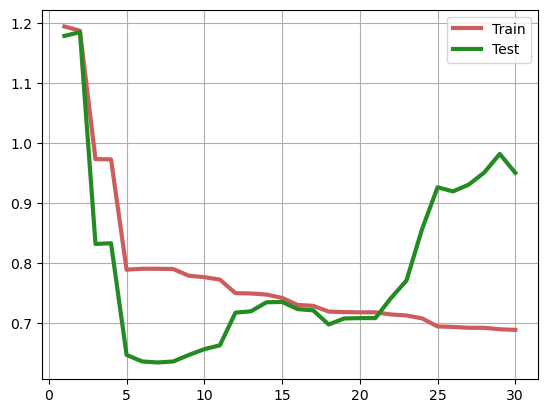

The optimal degree is 7 with a minimum test error of 0.6343782385244326


In [25]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

degrees = np.array(range(1, 31))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
errors_train, errors_test = [], []
min_error = np.inf
optimal_degree = None

for degree in degrees:
    poly = PolyFit(degree=degree)
    poly.fit(X_train, y_train)

    y_pred_train = poly.predict(X_train)
    acc_train = abs(y_pred_train - y_train).mean()
    errors_train.append(acc_train)

    y_pred_test = poly.predict(X_test)
    acc_test = abs(y_pred_test - y_test).mean()
    errors_test.append(acc_test)

    if acc_test < min_error:
        min_error = acc_test
        optimal_degree = degree

plt.figure()
plt.plot(degrees, errors_train, color='indianred', lw=3, label="Train")
plt.plot(degrees, errors_test, color='forestgreen', lw=3, label="Test")
plt.legend()
plt.grid()
plt.show()

print(f"The optimal degree is {optimal_degree} with a minimum test error of {min_error}")


## Part 2 - Facial recognition


In [26]:
import sklearn
print(sklearn.__version__)

1.2.2


First we load a dataset of images of famous persons and visualize some examples.

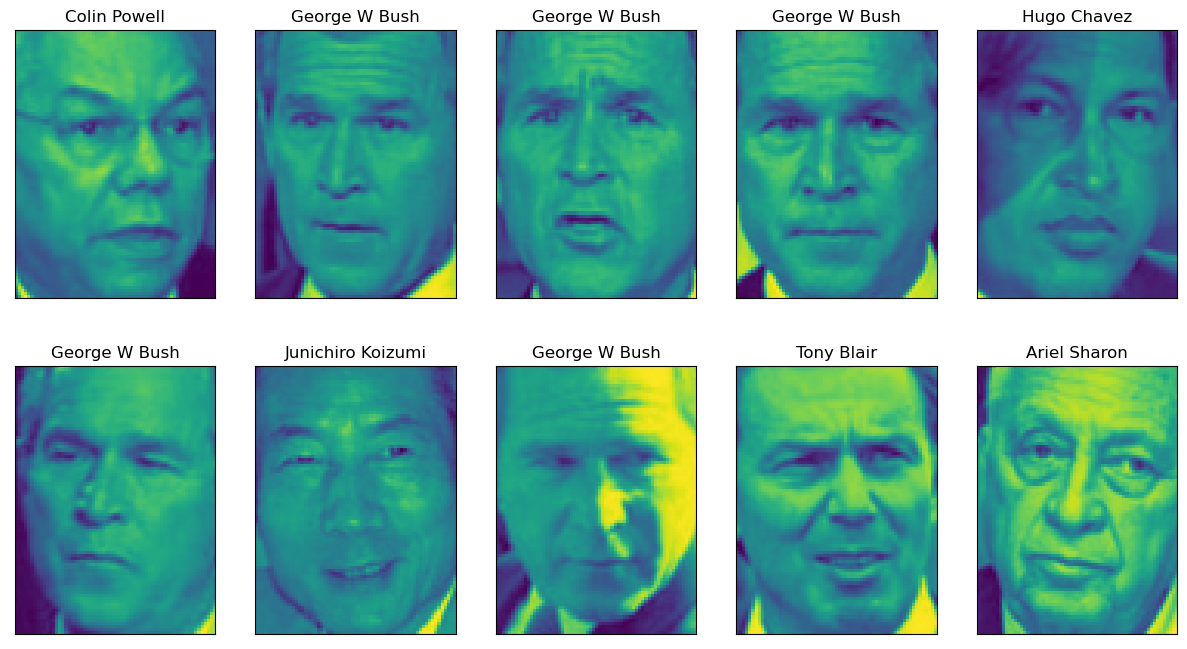

In [27]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt

people = fetch_lfw_people(min_faces_per_person=60, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

Some information about the dataset can be obtained by getting the documentation of the fetch function:

In [2]:
help(fetch_lfw_people)

Help on function fetch_lfw_people in module sklearn.datasets._lfw:

fetch_lfw_people(*, data_home=None, funneled=True, resize=0.5, min_faces_per_person=0, color=False, slice_=(slice(70, 195, None), slice(78, 172, None)), download_if_missing=True, return_X_y=False)
    Load the Labeled Faces in the Wild (LFW) people dataset (classification).
    
    Download it if necessary.
    
    =================   =======================
    Classes                                5749
    Samples total                         13233
    Dimensionality                         5828
    Features            real, between 0 and 255
    =================   =======================
    
    Read more in the :ref:`User Guide <labeled_faces_in_the_wild_dataset>`.
    
    Parameters
    ----------
    data_home : str, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    funneled : boo

We print data shapes info:

In [28]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (1348, 87, 65)
Number of classes: 8


We have 62 different persons in the dataset with a total of 3023 images of shape (87x65).

### Question 0
Count how many each person appears in the dataset. 

Hint: Look up the function `np.bincount`

In [29]:
# Count the occurrence of each target in the dataset
counts = np.bincount(people.target)

# Print the count for each person
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f"{name}: {count} images")


Ariel Sharon: 77 images
Colin Powell: 236 images
Donald Rumsfeld: 121 images
George W Bush: 530 images
Gerhard Schroeder: 109 images
Hugo Chavez: 71 images
Junichiro Koizumi: 60 images
Tony Blair: 144 images


We reshape the images the dataset to be of the form (n_samples x n_features)

In [30]:
X = people.images.reshape(len(people.images), -1)
y = people.target
X.min(), X.max(), X[0]

(0.0,
 1.0,
 array([0.5294118 , 0.52026147, 0.50980395, ..., 0.01045752, 0.00653595,
        0.00261438], dtype=float32))

The image values are between 0 and 255. We rescale them to 0-1.

In [31]:
X = X / 255

### Question 1
Split the dataset into train and test (80% train). Look up the documentation of `train_test_split` to make sure the frequency of each label is respected in the splits. If you wrote a naive classifier that predicts the target of the person by picking a number randomly (uniformly). What would be its prediction score ? 

This would be our score baseline i.e the performance of chance.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
baseline_score = 1.0 / len(np.unique(y))
print("Baseline score:", baseline_score)

Baseline score: 0.125


### Question 2

We start with making predictions with a K-nearest-neighbors (kNN) model. KNN predicts the target (the identity of the person) based on the majority vote of the target of the K closest images to it. Here we define "close" by computing a simple squared euclidean distance between the images.

Fit a k-NN with k [1, 2, 3, 4, 5] and compute its prediction score for train and test. How do you explain this result ? Does it overfit or underfit ?

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


ks = [1, 2, 3, 4, 5]
train_scores = []
test_scores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"For k = {k}, Train score: {train_score}, Test score: {test_score}")
    warnings.filterwarnings("ignore", category=FutureWarning, module="scipy.stats")



For k = 1, Train score: 1.0, Test score: 0.5888888888888889
For k = 2, Train score: 0.7884972170686456, Test score: 0.5074074074074074
For k = 3, Train score: 0.7708719851576994, Test score: 0.5185185185185185
For k = 4, Train score: 0.74860853432282, Test score: 0.5259259259259259
For k = 5, Train score: 0.7421150278293135, Test score: 0.5259259259259259


while k-NN with k=1 can perfectly fit the training data, it may not generalize well to unseen data in the test set, and you may see a comparatively lower test accuracy. This is because a k=1 model is extremely sensitive to small changes in the input data, and will be heavily influenced by noise and outliers. It underfits.

As k increases, the model starts to take into account more neighboring points, which can help it make more robust predictions that are less sensitive to noise in the data. However, this also makes the model more biased, and it might start to make more mistakes on the training data, leading to a lower training accuracy.

It is a trade-off between bias and variance. In general, the goal is to find a balance that results in the best performance on test data.

So, even though the model with k=1 has the highest accuracy on the training set, it is not necessarily be the best model for making predictions on new data. The best choice of k would generally be the one that achieves the highest accuracy on the test set, as this represents the model's ability to generalize to test data.

### Question
Display its train and test accuracy as a function of the number of train samples. Keep the number of test samples unchaned.

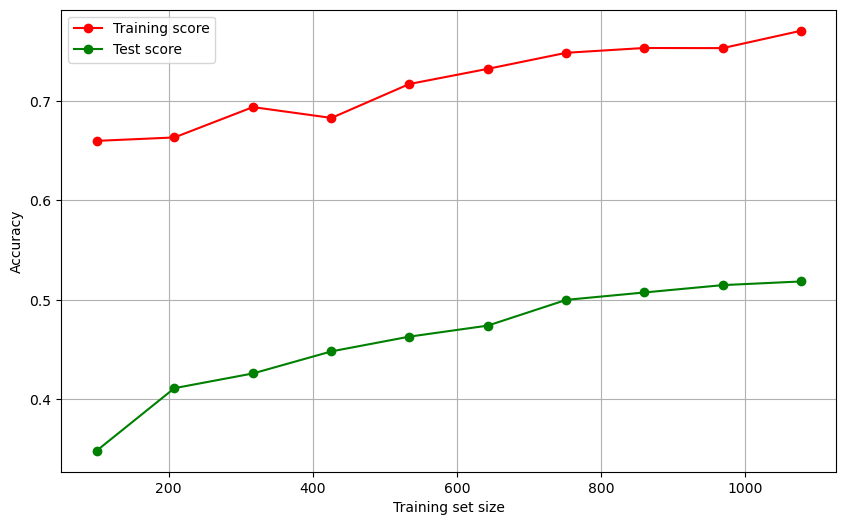

In [9]:
import warnings
from scipy import stats
warnings.filterwarnings("ignore", category=FutureWarning, module="scipy.stats")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the different training set sizes to use
train_sizes = np.linspace(100, len(X_train), 10, dtype=int) 
train_scores = []
test_scores = []
k = 3

# Loop over different training set sizes
for size in train_sizes:
    X_train_subset = X_train[:size]
    y_train_subset = y_train[:size]

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_subset, y_train_subset)
    
    train_pred = knn.predict(X_train_subset)
    train_score = accuracy_score(y_train_subset, train_pred)
    train_scores.append(train_score)

    test_pred = knn.predict(X_test)
    test_score = accuracy_score(y_test, test_pred)
    test_scores.append(test_score)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores, 'o-', color="g", label="Test score")
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


### Question 3
Compute knn scores but this time do a PCA before to reduce the dimensionality of the data to 100 components

In [34]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

train_scores = []
test_scores = []
neighbors = [1, 2, 3, 4, 5]

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    
    train_score = knn.score(X_train_pca, y_train)
    train_scores.append(train_score)
    
    test_score = knn.score(X_test_pca, y_test)
    test_scores.append(test_score)

for k, train_score, test_score in zip(neighbors, train_scores, test_scores):
    print(f"k={k}, Train Accuracy: {train_score:.3f}, Test Accuracy: {test_score:.3f}")


k=1, Train Accuracy: 1.000, Test Accuracy: 0.559
k=2, Train Accuracy: 0.779, Test Accuracy: 0.481
k=3, Train Accuracy: 0.776, Test Accuracy: 0.511
k=4, Train Accuracy: 0.750, Test Accuracy: 0.515
k=5, Train Accuracy: 0.746, Test Accuracy: 0.526


### Question 4 
Repeat this operation but set the PCA argument `whiten` to True. What do you notice ? How do you explain it ?

In [35]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pca = PCA(n_components=100, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

train_scores = []
test_scores = []
neighbors = [1, 2, 3, 4, 5]

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    
    train_score = knn.score(X_train_pca, y_train)
    train_scores.append(train_score)
    
    test_score = knn.score(X_test_pca, y_test)
    test_scores.append(test_score)

for k, train_score, test_score in zip(neighbors, train_scores, test_scores):
    print(f"k={k}, Train Accuracy: {train_score:.3f}, Test Accuracy: {test_score:.3f}")


k=1, Train Accuracy: 1.000, Test Accuracy: 0.674
k=2, Train Accuracy: 0.853, Test Accuracy: 0.619
k=3, Train Accuracy: 0.859, Test Accuracy: 0.663
k=4, Train Accuracy: 0.823, Test Accuracy: 0.652
k=5, Train Accuracy: 0.799, Test Accuracy: 0.622


### Question 5
Look up the attributes of the PCA object and visualize the first 10 components (as images).

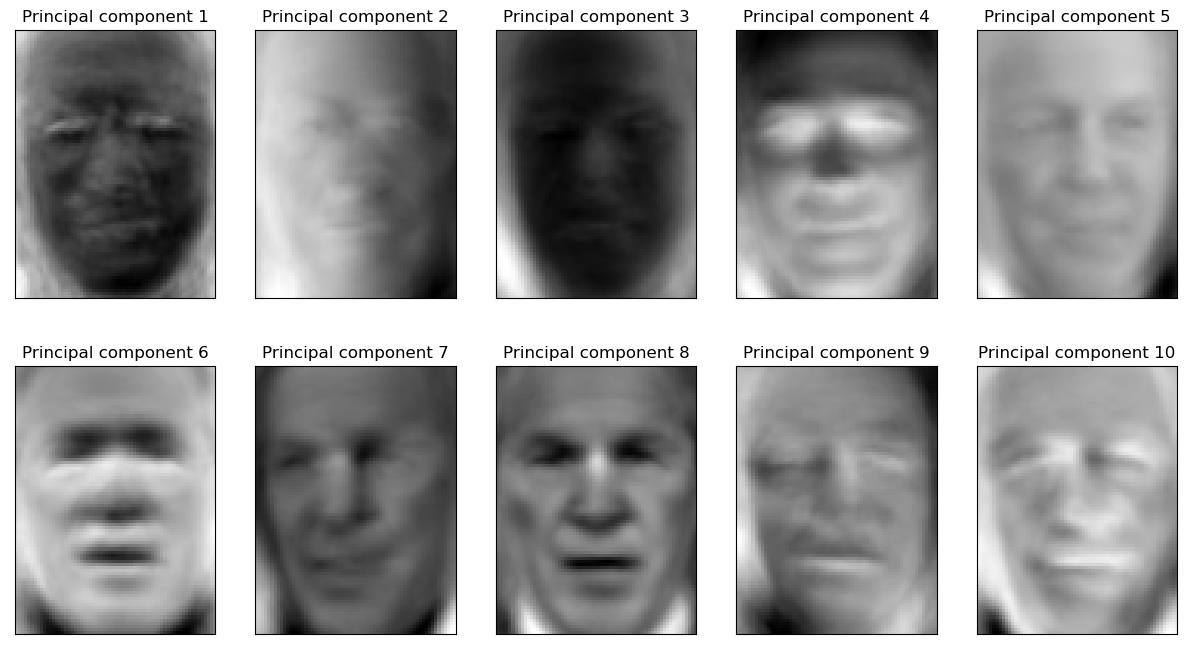

In [36]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
               cmap='gray')
    ax.set_title(f"Principal component {i+1}")
plt.show()


### Question 6
We can automatize the choice of K by performing cross-validation:

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model = KNeighborsClassifier()
params = {'n_neighbors': [2, 5, 10]}
clf = GridSearchCV(model, params, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

y_pred = clf.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.19      0.24        16
           1       0.48      0.68      0.57        47
           2       0.42      0.33      0.37        24
           3       0.59      0.79      0.68       106
           4       0.33      0.14      0.19        22
           5       0.33      0.07      0.12        14
           6       0.78      0.58      0.67        12
           7       0.31      0.14      0.19        29

    accuracy                           0.53       270
   macro avg       0.45      0.37      0.38       270
weighted avg       0.49      0.53      0.48       270



You can look up the best performing model:

In [38]:
clf.best_estimator_

KNeighborsClassifier()

We would like to optimize over the choice of PCA n_components as well. To do this we 
 can streamline the PCA + classifier operation by creating a pipeline object. And pass it to the GridSearchCV object with key-coded parameters named like this:

In [39]:
from sklearn.pipeline import Pipeline

model = Pipeline([('pca', PCA()),
                  ('classifier', KNeighborsClassifier()
)])

params = {'pca__n_components': [100, 1000], 'classifier__n_neighbors': [2]}



What are the best choices of n_components and k ?

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

clf = GridSearchCV(model, params, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


/Users/huyuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/huyuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/huyuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/huyuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fi

Best parameters:  {'classifier__n_neighbors': 2, 'pca__n_components': 100}
Best score:  0.505594315245478
              precision    recall  f1-score   support

           0       0.29      0.44      0.35        16
           1       0.41      0.66      0.50        47
           2       0.31      0.42      0.36        24
           3       0.63      0.63      0.63       106
           4       0.31      0.18      0.23        22
           5       0.50      0.07      0.12        14
           6       0.71      0.42      0.53        12
           7       0.67      0.21      0.32        29

    accuracy                           0.49       270
   macro avg       0.48      0.38      0.38       270
weighted avg       0.52      0.49      0.47       270



### Question 7
We move on to a different kind of model. We start with a simple linear classifier (LDA). 
Compute its performance (accuracy) with and without PCA. What do you notice ? Use a pipeline.

Interpret the results. What can you say about model complexity of LDA ? What should we do to improve the performance ?

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Without PCA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("Accuracy of LDA without PCA: ", accuracy_score(y_test, y_pred_lda))

# With PCA
pipeline = Pipeline([
    ("pca", PCA(n_components=100)),
    ("lda", LinearDiscriminantAnalysis())
])
pipeline.fit(X_train, y_train)
y_pred_pca_lda = pipeline.predict(X_test)
print("Accuracy of LDA with PCA: ", accuracy_score(y_test, y_pred_pca_lda))


Accuracy of LDA without PCA:  0.7333333333333333
Accuracy of LDA with PCA:  0.8148148148148148


The accuracy of LDA with PCA is significantly higher than the accuracy of LDA without PCA. 
PCA can reduce overfitting. Overfitting tends to occur in high-dimensional data when a model is too complex, in other words, when it has too many features relative to the number of observations. This complexity can lead the model to fit the noise in the training set, rather than the underlying pattern. By reducing the number of features, PCA can mitigate this risk.
LDA is a linear model, and as such, its complexity is relatively low compared to some other models such as Random Forests or Gradient Boosting. Nevertheless, it can still overfit if the number of features is very large. By using PCA to reduce the number of features, we can improve the model's generalization performance.

### Question 8
Repeat the operation with a random forest classifier. What do you notice ?

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Without PCA
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy of RandomForest without PCA: ", accuracy_score(y_test, y_pred_rf))

# With PCA
pipeline = Pipeline([
    ("pca", PCA(n_components=100)),
    ("rf", RandomForestClassifier())
])
pipeline.fit(X_train, y_train)
y_pred_pca_rf = pipeline.predict(X_test)
print("Accuracy of RandomForest with PCA: ", accuracy_score(y_test, y_pred_pca_rf))


Accuracy of RandomForest without PCA:  0.6296296296296297
Accuracy of RandomForest with PCA:  0.5666666666666667


The accuracy of Random Forest without PCA is significantly higher than the accuracy of Random Forest with PCA.
Random Forests, being non-linear models, can find complex relationships between variables and do not require the data to be on a lower-dimensional subspace.
This could explain why the Random Forest classifier performed better without PCA in this scenario. The dimensionality reduction might have removed some of the complexity in the data that the Random Forest model could handle and use to make better predictions.

### Question 9
Look up its hyperparameters (`min_samples_leaf`, `n_estimators`, `max_depth` etc). Tune the values of these these hyperparameters using GridSearchCV. Can you beat the LDA method ?

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 5, 10, 20], 
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))


Best parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}
Best accuracy score:  0.6215116279069768
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.76      0.79      0.77        47
           2       1.00      0.38      0.55        24
           3       0.57      0.97      0.72       106
           4       0.33      0.09      0.14        22
           5       1.00      0.71      0.83        14
           6       0.75      0.25      0.38        12
           7       0.78      0.24      0.37        29

    accuracy                           0.64       270
   macro avg       0.77      0.44      0.48       270
weighted avg       0.70      0.64      0.58       270



I get simillar result with the last question. It seems that it couldn't beat LDA method. For the best result, the original method should be looping thtough several parameters and find the argmax parameters. However, the RF model takes a lot of time to train and it's hard to implement the method.

### Question 10
GradientBoosting methoda are optimized versions of RandomForests where trees are added to the forest sequentially by picking "optimal" trees to add. Optimize their hyperparameters and compare with random forests.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                min_samples_leaf=50, max_depth=8,
                                max_features='sqrt', subsample=0.8, random_state=10)

param_test1 = {'n_estimators': range(20, 81, 10)}

gsearch1 = GridSearchCV(estimator=gb, param_grid=param_test1, 
                        scoring='accuracy', cv=5, n_jobs=-1)
gsearch1.fit(X_train, y_train)

print("Best parameters: ", gsearch1.best_params_)
print("Best accuracy score: ", gsearch1.best_score_)


Best parameters:  {'n_estimators': 80}
Best accuracy score:  0.6753186907838071


It gets higher accuracy score than the random forest model.